# Loan Payment Calculator

In [76]:
import matplotlib.pyplot as plt

##**Define loan parameters**


In [96]:
principal = 37500000
interest_rate = 9.85/100
loan_duration = 4 #in yrs
print("Yearly intrest rate    : ",interest_rate*100,'%')
print("Total intrest (approx) : Rs.",round(principal*interest_rate*loan_duration,2),"--> fixed interest for ",loan_duration," years")


Yearly intrest rate    :  9.85 %
Total intrest (approx) : Rs. 14775000.0 --> fixed interest for  4  years


## **Calculate monthly payment**

The formula used to calculate the monthly payment of a loan is based on the concept of present value. It is calculated using the following formula: <br> <br>` monthly_payment = (r * P) / (1 - (1 + r)^(-n))`  <br> <br> Where:

- P is the principal amount of the loan
- r is the monthly interest rate
- n is the total number of monthly payments over the life of the loan <br><br>

The formula works by calculating the present value of the loan, which is the amount of money needed to be paid today to cover the future payments. The formula then solves for the monthly payment amount that would result in this present value, given the loan parameters.


In [97]:
n_months = loan_duration * 12
monthly_rate = interest_rate / 12
monthly_payment = (monthly_rate * principal) / (1 - (1 + monthly_rate)**(-n_months))
print("Monthly intrest rate : ",round(monthly_rate*100, 4),'%')
print("Monthly payment amount : Rs.",round(monthly_payment,2))

Monthly intrest rate :  0.8208 %
Monthly payment amount : Rs. 948397.78


## **Calculate and store loan balance and interest paid for each month**

In [98]:
#initial values
print("Loan Amount : Rs.",principal," @ ",interest_rate*100,'%')
print("Monthly Interest rate : ",round(monthly_rate*100, 4),'%')
print("Monthly payment amount : Rs.",round(monthly_payment,2))
print("==========================================================")
# initialise parameters
balance = principal
interest_paid = 0
balances = []
interests = []
yr = 0
yr_interest_paid = 0
yr_principal_paid = 0
# monthly calculation
for i in range(1, n_months+1):
    interest = monthly_rate * balance
    principal_paid = monthly_payment - interest
    balance -= principal_paid
    interest_paid += interest
    balances.append(balance)
    interests.append(interest_paid)
    yr_interest_paid += interest
    yr_principal_paid += principal_paid
    # if i==1 or i==2 or i==3:
    if False:
      print("MONTH : ",i,"--------------------------------")
      print("Interest amount    : Rs.",round(abs(interest),2))
      print("Principal amount   : Rs.",round(principal_paid,2))
      print("Total amount paid  : Rs.",round(interest + principal_paid,2))
      print("Remaining balance  : Rs.",round(abs(balance),2))
      print("")
    if True and i%12==0:
      yr+=1
      print("YEAR : ", yr)
      print("--> Total interest amt paid  : Rs.", round(yr_interest_paid,2))
      print("--> Total principal amt paid : Rs.", round(yr_principal_paid,2))
      print("--> Total amt paid           : Rs.", round(yr_interest_paid+yr_principal_paid,2))
      print("Remaining balance            : Rs.",round(abs(balance),2))
      print("-------------------------------------------------------------")
      print("")
      yr_interest_paid = 0
      yr_principal_paid = 0
print("TOTAL")
print("-------------------------------------------------------------------")
print("Total interest amt paid  : Rs.", round(interest_paid,2))
print("Total amount paid        : Rs.", round(principal + interest_paid,2))
print("Pincipal amount          : Rs.", principal)
print("")

Loan Amount : Rs. 37500000  @  9.85 %
Monthly Interest rate :  0.8208 %
Monthly payment amount : Rs. 948397.78
YEAR :  1
--> Total interest amt paid  : Rs. 3337039.91
--> Total principal amt paid : Rs. 8043733.5
--> Total amt paid           : Rs. 11380773.41
Remaining balance            : Rs. 29456266.5
-------------------------------------------------------------

YEAR :  2
--> Total interest amt paid  : Rs. 2507965.76
--> Total principal amt paid : Rs. 8872807.64
--> Total amt paid           : Rs. 11380773.41
Remaining balance            : Rs. 20583458.86
-------------------------------------------------------------

YEAR :  3
--> Total interest amt paid  : Rs. 1593438.27
--> Total principal amt paid : Rs. 9787335.14
--> Total amt paid           : Rs. 11380773.41
Remaining balance            : Rs. 10796123.72
-------------------------------------------------------------

YEAR :  4
--> Total interest amt paid  : Rs. 584649.68
--> Total principal amt paid : Rs. 10796123.72
--> Total am

## **Create plot of loan balance and interest paid over time**

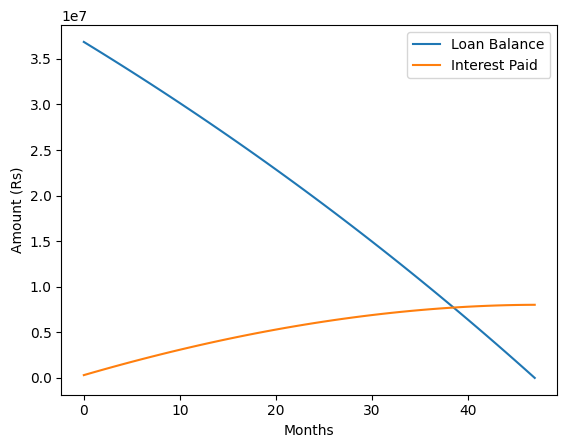

In [91]:
fig, ax = plt.subplots()
ax.plot(range(n_months), balances, label='Loan Balance')
ax.plot(range(n_months), interests, label='Interest Paid')
ax.set_xlabel('Months')
ax.set_ylabel('Amount (Rs)')
ax.legend()
plt.show()